<a href="https://colab.research.google.com/github/mahmoud0alabsi/ProgressSoft-Problems/blob/main/Problem-2_FaceMaskDetection/Problem_2_FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# !pip install --upgrade pip
# !pip install tensorflow

In [1]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Input,MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from keras import callbacks
import cv2
from sklearn.utils import shuffle
import imutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import classification_report


# Import Data

**Data source : Kaggle ('https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset')**

* Train set size: **800** (With mask)    **800** (Without mask)

* Validate set size: **400** (With mask)    **400** (Without mask)

* Test set size: **483** (With mask)    **509** (Without mask)


In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
                '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Train/',
                image_size=(150, 150)
                )

Found 1600 files belonging to 2 classes.


In [3]:
vald_data = tf.keras.utils.image_dataset_from_directory(
        '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Validation',
        image_size=(150, 150)
        )

Found 800 files belonging to 2 classes.


In [4]:
test_data = tf.keras.utils.image_dataset_from_directory(
            '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Test',
            image_size=(150, 150)
            )

Found 992 files belonging to 2 classes.


# Display some images

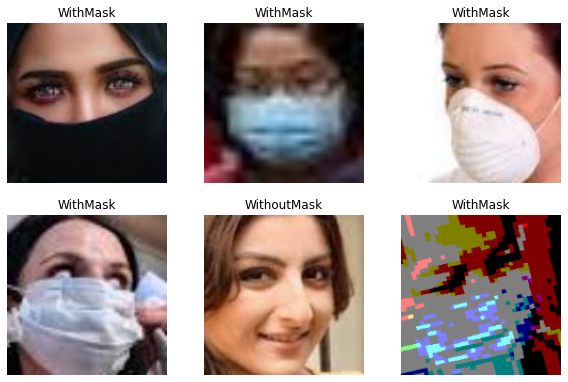

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")


In [6]:
# train_data shape
for image_batch, labels_batch in train_data:
  print(image_batch.shape, '   (batch_size , hight , width , channel "RGB")')
  print(labels_batch.shape, '               (batch_size)')
  break

(32, 150, 150, 3)    (batch_size , hight , width , channel "RGB")
(32,)                (batch_size)


# Build Model

In [50]:
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                    shear_range=0.2,
                                    rescale= 1./255,
                                    zoom_range=0.2)

train_path = '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Train'  #Training data path
train_generator = train_datagen.flow_from_directory(
                                        train_path,
                                        target_size=(150,150),
                                        batch_size=32,
                                        shuffle = True,
                                        seed = 42,
                                        class_mode = "categorical",
                                        classes = ['WithMask','WithoutMask'])


validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_path = '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Validation'   #validation data path
validation_generator = validation_datagen.flow_from_directory(
                                              validation_path,
                                              target_size=(150,150),
                                              seed = 42,
                                              shuffle = True,
                                              batch_size=32,
                                              class_mode = "categorical",
                                             classes = ['WithMask','WithoutMask'])


test_datagen = ImageDataGenerator(rescale=1.0/255)
test_path = '/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/archive/Face Mask Dataset/Test'   #validation data path
test_generator = test_datagen.flow_from_directory(
                                              test_path,
                                              target_size=(150,150),
                                              seed = 42,
                                              shuffle = False,
                                              batch_size=32,
                                              class_mode = "categorical",
                                              classes = ['WithMask','WithoutMask'])

Found 1600 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',strides=2),
    tf.keras.layers.MaxPooling2D(2,2),
       
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [52]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])

In [53]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 6, 
                                        restore_best_weights = True, verbose=1)

In [54]:
history = model.fit_generator(
              train_generator,
              epochs=30,
              validation_data=validation_generator,
              callbacks =[earlystopping])

<ipython-input-54-5b4c9b13725e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
50/50 [==============================] - 16s 280ms/step - loss: 0.3671 - acc: 0.8363 - val_loss: 0.1943 - val_acc: 0.9337
Epoch 2/30
50/50 [==============================] - 14s 277ms/step - loss: 0.1779 - acc: 0.9344 - val_loss: 0.1354 - val_acc: 0.9438
Epoch 3/30
50/50 [==============================] - 14s 277ms/step - loss: 0.1370 - acc: 0.9481 - val_loss: 0.1603 - val_acc: 0.9375
Epoch 4/30
50/50 [==============================] - 14s 277ms/step - loss: 0.1243 - acc: 0.9588 - val_loss: 0.0981 - val_acc: 0.9750
Epoch 5/30
50/50 [==============================] - 14s 281ms/step - loss: 0.1294 - acc: 0.9563 - val_loss: 0.1160 - val_acc: 0.9688
Epoch 6/30
50/50 [==============================] - 15s 297ms/step - loss: 0.1488 - acc: 0.9506 - val_loss: 0.1217 - val_acc: 0.9638
Epoch 7/30
50/50 [==============================] - 14s 277ms/step - loss: 0.1194 - acc: 0.9569 - val_loss: 0.1831 - val_acc: 0.9237
Epoch 8/30
50/50 [==============================] - 14s 276ms/step - 

In [ ]:
model.summary()

###Evaluate model

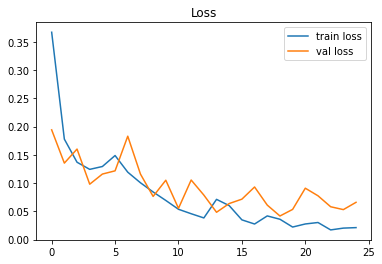

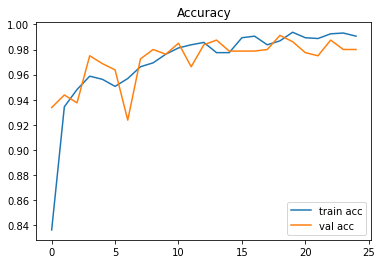

In [55]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()

**Evaluate using test data set**

In [56]:
cnn_eval = model.evaluate(test_generator)    #0.9698  #0.9728

31/31 [==============================] - 3s 91ms/step - loss: 0.0330 - acc: 0.9899


In [57]:
test_pred = model.predict(test_generator)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_generator.labels

31/31 [==============================] - 3s 88ms/step


**Confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

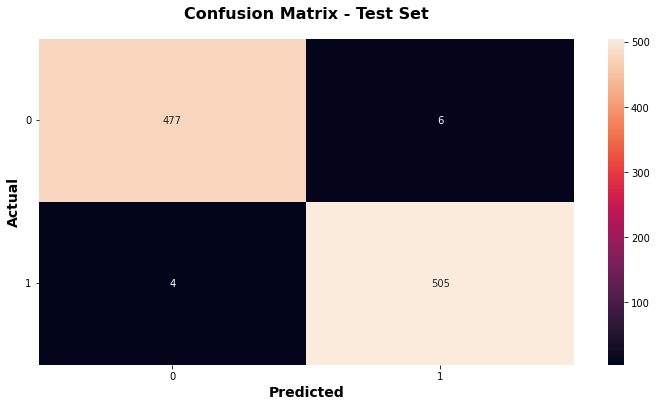

In [58]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

### Model accuracy

In [74]:
Y_pred = model.predict(test_generator, test_generator.samples / 32)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_generator.classes
print(classification_report(val_trues, val_preds))

31/31 [==============================] - 3s 90ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.99      0.99      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



## Save model

In [62]:
model.save('/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/model_1.h5')

# Test model

## Load Pre-Trained model

In [63]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/AI/ProgressSoft Tasks/Problem-2/model_1.h5')

In [64]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 74, 74, 64)        1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 41472)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               5308544   
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                      

## Test & Predict 

In [69]:
classes = train_data.class_names

In [161]:
def predict_image(path):
  image = tf.keras.utils.load_img(path, target_size=(150, 150))
  input_arr = tf.keras.utils.img_to_array(image)
  img_batch = np.expand_dims(input_arr, axis=0)
  y = model.predict(img_batch);
  res = classes[y.argmax()]
  plt.imshow(image)
  plt.xlabel(res, fontsize=18)
  plt.show();


1/1 [==============================] - 0s 41ms/step


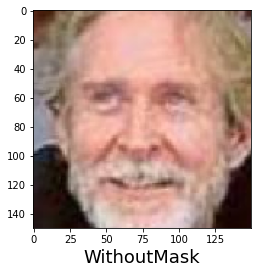

1/1 [==============================] - 0s 63ms/step


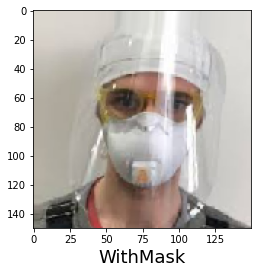

1/1 [==============================] - 0s 64ms/step


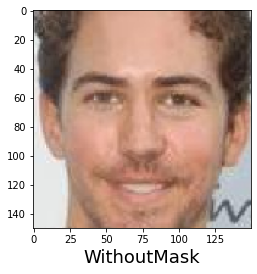

1/1 [==============================] - 0s 84ms/step


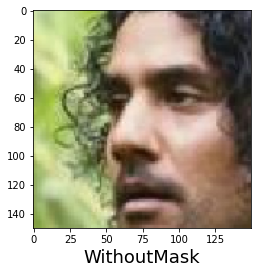

1/1 [==============================] - 0s 29ms/step


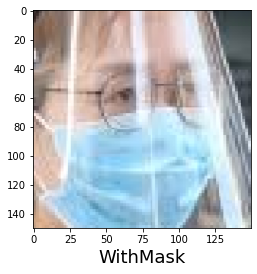

1/1 [==============================] - 0s 30ms/step


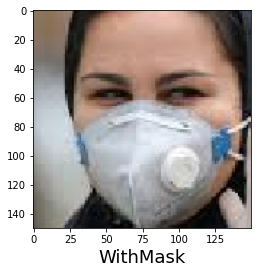

1/1 [==============================] - 0s 30ms/step


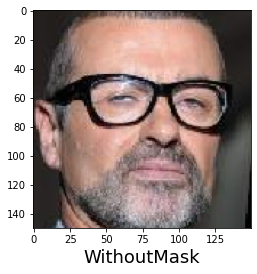

1/1 [==============================] - 0s 20ms/step


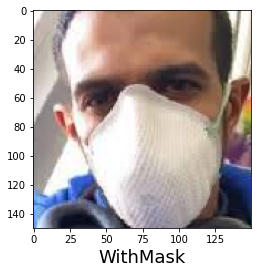

1/1 [==============================] - 0s 20ms/step


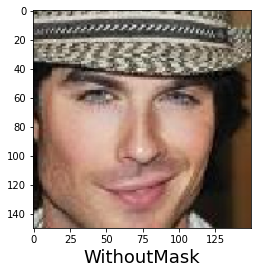

1/1 [==============================] - 0s 20ms/step


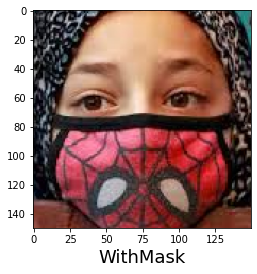

In [167]:
paths = ['/content/152.png','/content/255.png', '/content/85.png',
         '/content/193.png', '/content/742.png', '/content/392.png',
         '/content/51.png', '/content/79.png', '/content/386.png','/content/86.png']

for path in paths:
  plt.figure(figsize=(4,4))
  predict_image(path) 

# Final

In [170]:
Y_pred = new_model.predict(test_generator, test_generator.samples / 32)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_generator.classes
print(classification_report(val_trues, val_preds))

31/31 [==============================] - 3s 90ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.99      0.99      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992

